<a href="https://colab.research.google.com/github/laisab/AprendizadoDeMaquina/blob/main/Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão / Algoritmos de regressão / Metodologia de avaliação / Medidas de avaliação**

Na regressão, o atributo alvo é um número real. Um algoritmo desse tipo prevê o valor de uma variável dependente com base em uma ou mais variáveis independentes.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
warnings.filterwarnings('ignore')

## Geração de dados

Dois conjuntos de dados sintéticos: um com relação linear e outro com relação polinomial.

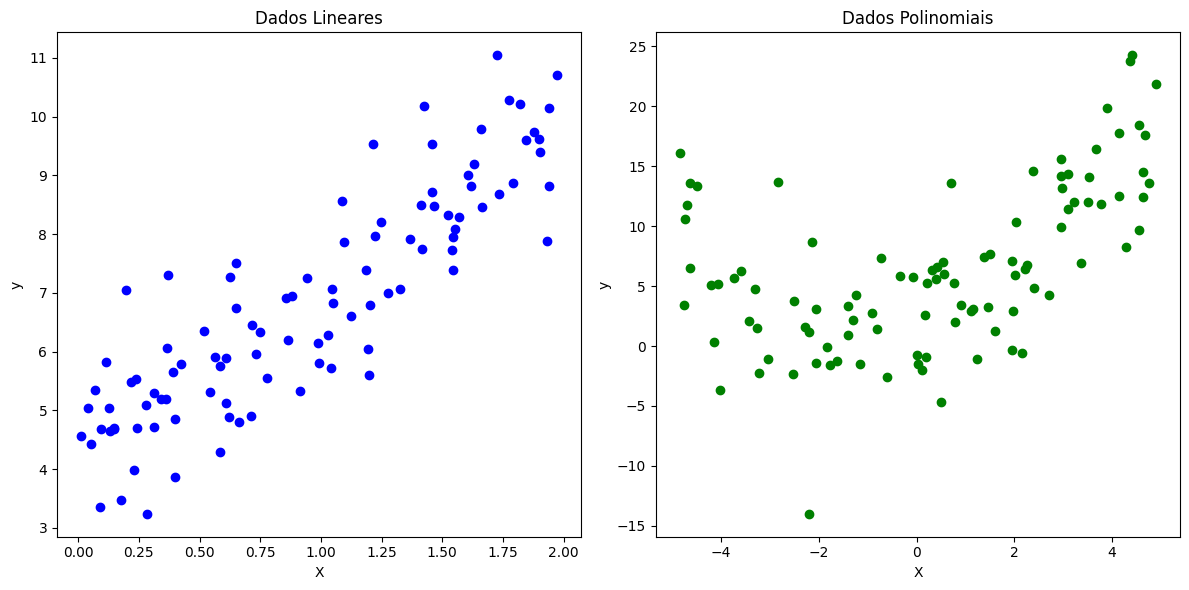

In [6]:
# Geração dos dados para regressão linear
np.random.seed(42)
X_linear = 2 * np.random.rand(100, 1)
y_linear = 4 + 3 * X_linear + np.random.randn(100, 1) # Relação linear com ruído

# Geração dos dados para regressão polinomial
X_poly = np.random.rand(100, 1) * 10 - 5 # 100 pontos entre -5 e +5
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(100, 1) * 5 # Relação quadrática com ruído

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_linear, y_linear, color='blue')
plt.title('Dados Lineares')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(X_poly, y_poly, color='green')
plt.title('Dados Polinomiais')
plt.xlabel('X')
plt.ylabel('y')

plt.tight_layout()
plt.show()

## **Regressão Linear**

Aprende uma função linear que melhor aproxima a entrada e a saída, ou seja, a função que comete a menor quantidade de erros possível.

* β0: intercepto (viés).

* β1: coeficiente i = 1 associado a uma variável preditiva.

   REGRESSÃO LINEAR
Intercepto (β0): 4.14
Coeficiente (β1): 2.80
MAE: 0.59
MSE: 0.65
RMSE: 0.81
R-Squared: 0.81



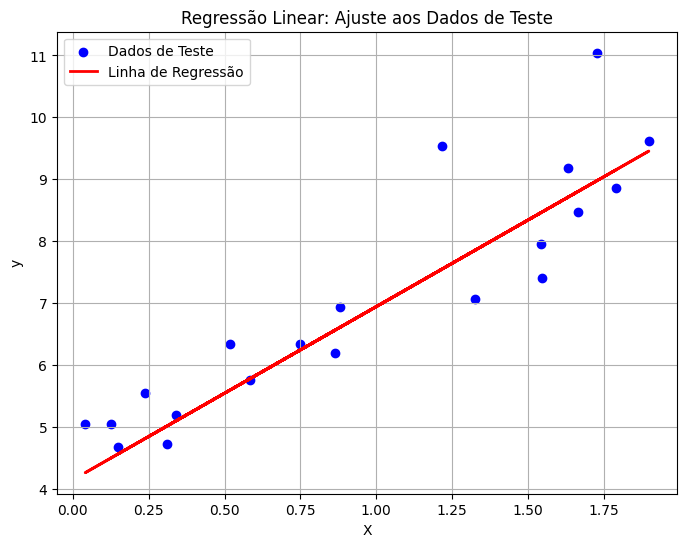

In [14]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

y_pred_linear = linear_model.predict(X_test_linear)

# ----- Avaliação do modelo -----
# MAE: Mean Absolute Error
mae_linear = mean_absolute_error(y_test_linear, y_pred_linear)

# MSE: Mean Squared Error
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)

# RMSE: Root Mean Squared Error
rmse_linear = np.sqrt(mse_linear)

# R-Squared
r2_linear = r2_score(y_test_linear, y_pred_linear)

print('   REGRESSÃO LINEAR')
print(f'Intercepto (β0): {linear_model.intercept_[0]:.2f}')
print(f'Coeficiente (β1): {linear_model.coef_[0][0]:.2f}')
print(f'MAE: {mae_linear:.2f}')
print(f'MSE: {mse_linear:.2f}')
print(f'RMSE: {rmse_linear:.2f}')
print(f'R-Squared: {r2_linear:.2f}\n')

plt.figure(figsize=(8, 6))
plt.scatter(X_test_linear, y_test_linear, color='blue', label='Dados de Teste')
plt.plot(X_test_linear, y_pred_linear, color='red', linewidth=2, label='Linha de Regressão')
plt.title('Regressão Linear: Ajuste aos Dados de Teste')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## **Regressão Polinomial**

Caso especial de regressão linear.

   REGRESSÃO POLINOMIAL
MAE: 3.76
MSE: 19.04
RMSE: 4.36
R-Squared: 0.74



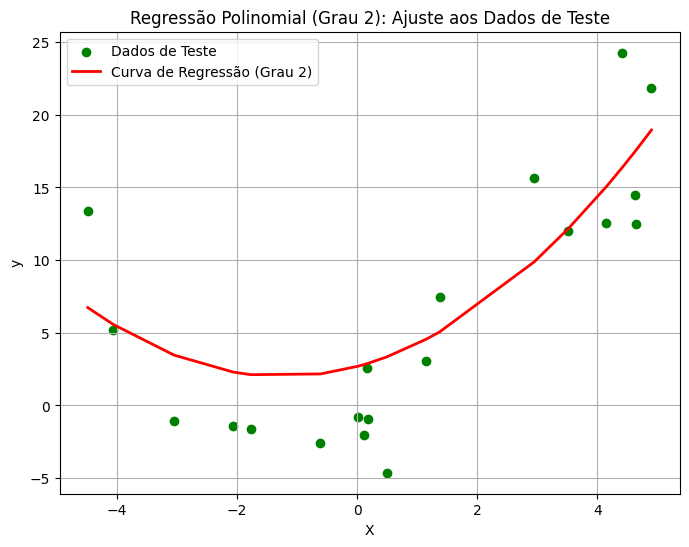

In [16]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Grau do polinômio
grau = 2
poly_features = PolynomialFeatures(degree=grau)

X_train_poly_trans = poly_features.fit_transform(X_train_poly)
X_test_poly_trans = poly_features.transform(X_test_poly)

poly_model = LinearRegression()
poly_model.fit(X_train_poly_trans, y_train_poly)

y_pred_poly = poly_model.predict(X_test_poly_trans)

# ----- Avaliação do modelo -----
# MAE: Mean Absolute Error
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)

# MSE: Mean Squared Error
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)

# RMSE: Root Mean Squared Error
rmse_poly = np.sqrt(mse_poly)

# R-Squared
r2_poly = r2_score(y_test_poly, y_pred_poly)

print('   REGRESSÃO POLINOMIAL')
print(f'MAE: {mae_poly:.2f}')
print(f'MSE: {mse_poly:.2f}')
print(f'RMSE: {rmse_poly:.2f}')
print(f'R-Squared: {r2_poly:.2f}\n')

plt.figure(figsize=(8, 6))
plt.scatter(X_test_poly, y_test_poly, color='green', label='Dados de Teste')
X_test_poly_ordenado = np.sort(X_test_poly, axis=0)
X_test_poly_trans_ordenado = poly_features.transform(X_test_poly_ordenado)
y_pred_poly_ordenado = poly_model.predict(X_test_poly_trans_ordenado)
plt.plot(X_test_poly_ordenado, y_pred_poly_ordenado, color='red', linewidth=2, label=f'Curva de Regressão (Grau {grau})')
plt.title(f'Regressão Polinomial (Grau {grau}): Ajuste aos Dados de Teste')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Regularização**: "calibra" os coeficientes, o que ajuda na seleção dos atributos mais relevantes. Essa técnica evita o overfitting.

* **Lasso**: útil para dados com alta dimensionalidade e atributos irrelevantes.
* **Ridge**: útil para dados com atributos redundantes.

   REGRESSÃO LASSO
Intercepto (β0): 4.42
Coeficiente (β1): 2.50
MAE: 0.55
MSE: 0.66
RMSE: 0.81
R-Squared: 0.81



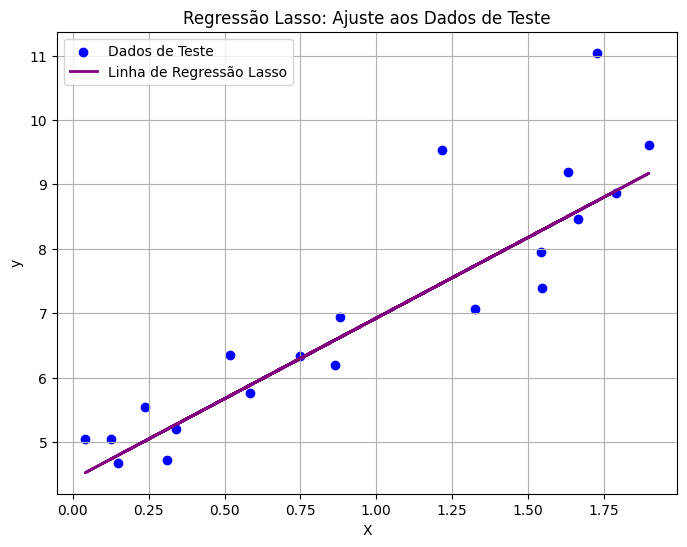

In [20]:
lasso = Lasso(alpha=0.1) # Controle da força de regularização
lasso.fit(X_train_linear, y_train_linear)
y_pred_lasso = lasso.predict(X_test_linear)

mae_lasso = mean_absolute_error(y_test_linear, y_pred_lasso)
mse_lasso = mean_squared_error(y_test_linear, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test_linear, y_pred_lasso)

print('   REGRESSÃO LASSO')
print(f'Intercepto (β0): {lasso.intercept_[0]:.2f}')
print(f'Coeficiente (β1): {lasso.coef_[0]:.2f}')
print(f'MAE: {mae_lasso:.2f}')
print(f'MSE: {mse_lasso:.2f}')
print(f'RMSE: {rmse_lasso:.2f}')
print(f'R-Squared: {r2_lasso:.2f}\n')

plt.figure(figsize=(8, 6))
plt.scatter(X_test_linear, y_test_linear, color='blue', label='Dados de Teste')
plt.plot(X_test_linear, y_pred_lasso, color='purple', linewidth=2, label='Linha de Regressão Lasso')
plt.title('Regressão Lasso: Ajuste aos Dados de Teste')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

   REGRESSÃO RIDGE
Intercepto (β0): 4.15
Coeficiente (β1): 2.79
MAE: 0.59
MSE: 0.65
RMSE: 0.81
R-Squared: 0.81



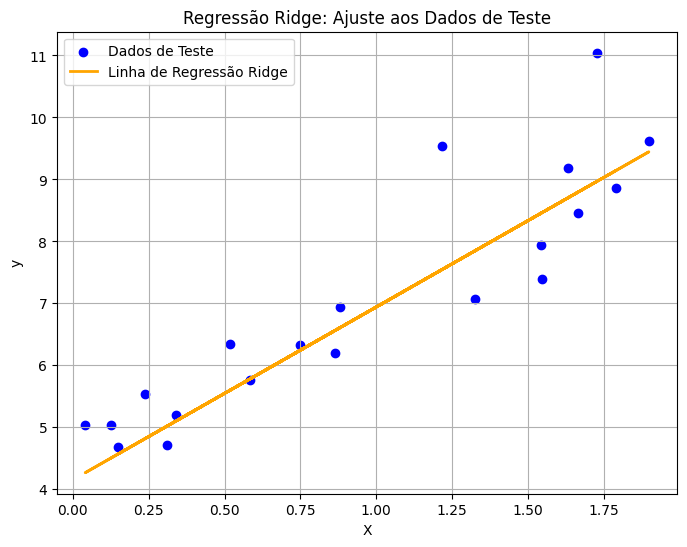

In [21]:
ridge = Ridge(alpha=0.1) # Controle da força de regularização
ridge.fit(X_train_linear, y_train_linear)
y_pred_ridge = ridge.predict(X_test_linear)

mae_ridge = mean_absolute_error(y_test_linear, y_pred_ridge)
mse_ridge = mean_squared_error(y_test_linear, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test_linear, y_pred_ridge)

print('   REGRESSÃO RIDGE')
print(f'Intercepto (β0): {ridge.intercept_[0]:.2f}')
print(f'Coeficiente (β1): {ridge.coef_[0]:.2f}')
print(f'MAE: {mae_ridge:.2f}')
print(f'MSE: {mse_ridge:.2f}')
print(f'RMSE: {rmse_ridge:.2f}')
print(f'R-Squared: {r2_ridge:.2f}\n')

plt.figure(figsize=(8, 6))
plt.scatter(X_test_linear, y_test_linear, color='blue', label='Dados de Teste')
plt.plot(X_test_linear, y_pred_ridge, color='orange', linewidth=2, label='Linha de Regressão Ridge')
plt.title('Regressão Ridge: Ajuste aos Dados de Teste')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()